### Question 1.  A Tensorflow2 Convolutional Neural Network on the MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### 1.1 (1) Tensorflow2 imports 

In [9]:
# Your Code Here
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ReLU, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model,save_model


tf.__version__

'2.3.1'

#### 1.2 (1) Load the Mnist data set into X_train,y_train,X_test and y_test


In [10]:
# Your Code Here
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### 1.3 (1) Display the 5th Image in the test set

4


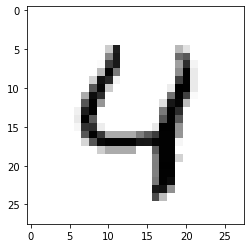

In [11]:
# Your Code Here
plt.imshow(X_test[4], cmap=plt.cm.binary)
print(y_test[4])

####  1.4 (2) Reshape each image to 28x28x1, convert to float32 and scale to between 0 and 1


In [12]:
# Your Code Here
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)
print(X_train.shape, X_test.shape)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)


#### 1.5 (2) One-hot encode the target labels

In [13]:
# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('One hot shape ',y_test_one_hot.shape)
# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

One hot shape  (10000, 10)
Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 1.6 (2) Split training data into training data and validation data 


In [14]:
# Your Code Here
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

#### 1.7 (6) Specify the model structure and output a model summary

* Use two Convolutional 2D layers, 2 MaxPooling layers and 2 ReLu layers, 2 dropout layers and a Feed Foward layer.
* The two Convolutional 2D layers should have output of 16 and 32 channels
* Display a summary of the model

In [15]:
# Your Code Here
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),
                     padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(ReLU())
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(LeakyReLU(alpha=0.1))    
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
re_lu_2 (ReLU)               (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
re_lu_3 (ReLU)               (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)         

#### 1.8 (1) Compile Model with cross entropy loss,  the Adam optimizer with a learning rate of 0.001 and an accuracy metric


In [16]:
# Your Code Here
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

####  1.9 (3) Train the model with a mini-batch size of 128 for 10 epochs. Include the validation set.


In [17]:
# Your Code Here
batch_size = 128
epochs = 10
model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
                        validation_data=(valid_X, valid_label))

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.4398 - accuracy: 0.8634 - val_loss: 0.1360 - val_accuracy: 0.9605
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1572 - accuracy: 0.9507 - val_loss: 0.0909 - val_accuracy: 0.9721
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1195 - accuracy: 0.9619 - val_loss: 0.0709 - val_accuracy: 0.9808
Epoch 4/10
375/375 [==============================] - 8s 23ms/step - loss: 0.0951 - accuracy: 0.9694 - val_loss: 0.0677 - val_accuracy: 0.9790
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0824 - accuracy: 0.9739 - val_loss: 0.0531 - val_accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0731 - accuracy: 0.9769 - val_loss: 0.0499 - val_accuracy: 0.9846
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0680 - accuracy: 0.9779 - val_loss: 0.0471 - val_accuracy: 0.9856

#### 1.10 (2) Plot the training and validation loss

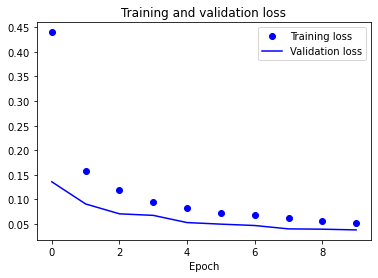

In [18]:
# Your Code Here
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.title('Training and validation loss')
plt.legend();

#### 1.11 (2) Evaluate the model on test set. Output the test loss and test accuracy

In [19]:
# Your Code Here
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.028371615335345268
Test accuracy: 0.9909999966621399


#### 1.12 (2) Predict the test data. Display a confusion matrix for the predicted and true label. Print the accuracy

In [20]:
# Your Code Here
predicted_classes = model.predict(X_test)

print(predicted_classes[0,:])
print(np.round(predicted_classes[0,:],5))
print(predicted_classes.shape)


predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(f'Predicted = {predicted_classes[0]}, label = {y_test[0]}')
predicted_classes.shape, y_test.shape

cm = confusion_matrix(predicted_classes,y_test)
print(cm)

print(f'Accuracy: {np.trace(cm)/np.sum(cm)}')

[4.6400244e-09 6.4343645e-08 2.6609375e-06 3.5487086e-05 9.6009858e-09
 1.1314625e-08 2.0452234e-14 9.9991131e-01 5.9108825e-08 5.0393322e-05]
[0.0000e+00 0.0000e+00 0.0000e+00 4.0000e-05 0.0000e+00 0.0000e+00
 0.0000e+00 9.9991e-01 0.0000e+00 5.0000e-05]
(10000, 10)
Predicted = 7, label = 7
[[ 979    2    3    0    1    2   13    3    6   10]
 [   0 1130    1    0    0    0    1    1    0    1]
 [   0    2 1023    1    0    0    0    2    1    0]
 [   1    0    2 1006    0    3    0    1    1    0]
 [   0    0    0    0  969    0    1    0    0    3]
 [   0    0    0    1    0  883    2    0    1    0]
 [   0    1    0    0    1    2  940    0    0    0]
 [   0    0    2    0    0    0    0 1018    2    3]
 [   0    0    1    1    0    0    1    1  958    0]
 [   0    0    0    1   11    2    0    2    5  992]]
Accuracy: 0.9898
